# Examen 2: Métodos computacionales.

## Profesor: Hernán Salinas
### Universidad de Antioquia

El examen consta de dos partes, cada una con igual valor. Es un examen individual y no se permite el uso de herramientas de inteligencia artificial para su realización. Una lectura detallada será suficiente para resolver ambos problemas, basándose en los conocimientos adquiridos en el curso.


### I. Radiación de Cuerpo Negro:

 La radiación de cuerpo negro, se refiere a la radiación electromagnética emitida por un objeto que absorbe toda la radiación incidente sin reflejar nada. La cual  puede ser modelada según la ley de Planck que relaciona la intensidad de la radiación de un cuerpo negro con la temperatura del objeto. A medida que la temperatura aumenta, la longitud de onda máxima de la radiación se desplaza hacia longitudes de onda más cortas. Para generar una intuición,  piensa en  trozo  de carbón, el cual representa un ejemplo cercano a lo que se conoce como un cuerpo negro en física. Este elemento tiene la particularidad de reflejar mínimamente la luz, capturando prácticamente toda la radiación que recibe. Al alcanzar temperaturas elevadas, similar a las de las brasas ardientes, el carbón comienza a emitir radiación tanto en el rango visible como en el infrarrojo del espectro.

  La radiación de cuerpo negro puede ser modelada empleando la ley de Planck para describir la densidad  espectral  de energía de la radiación emitida por un cuerpo negro a una temperatura (T). La ley de Planck establece que la densidad espectral de energía $u(\lambda, T)$  para un cuerpo negro está dada por:

\begin{equation}
u(\lambda, T) = \frac{{8\pi hc}}{{\lambda^5}} \cdot \frac{1}{{e^{\frac{{hc}}{{\lambda k_B T}}} - 1}}
\end{equation}

 donde:

$h = 6.62607015  \times 10^{-34} \mathrm{J} s$ : es la constante de Planck.

$c = 299792458 \mathrm{m/s}$ : es la velocidad de la luz.


$k_B = 1.380649 \times 10^{-23}\mathrm{J/K}$ : es la constante de Boltzmann.

$ \lambda$ es la longitud de onda.


Podemos integrar la densidad espectral de energía sobre todas las longitudes de onda para obtener la potencia total emitida por unidad de área de un cuerpo negro a una temperatura (T) (ley  de Stefan-Boltzmann):


\begin{equation}
P_{\text{total}} = \sigma T^4
\end{equation}

donde:

$\sigma$ es la constante de Stefan-Boltzmann.


Su tarea en este examen será:

1. Realizar una gráfica de $u(\lambda, T)$ vs $\lambda$, toma valores de $\lambda$ entre $1\mathrm{nm}$ y $8\mathrm{\mu m}$, para valores de
```T=np.array([1000,2000,4000,5000]) ```K


Las curvas resultantes deben reflejar el comportamiento típico de datos experimentales, tal como se muestra al ejecutar el siguiente código :

```python
import requests
from io import StringIO


# URL del archivo txt en línea
url_del_archivo = 'http://www.sc.ehu.es/sbweb/fisica3/calor/radiacion/espectro.txt'

# Realizar una petición GET para obtener el contenido del archivo
respuesta = requests.get(url_del_archivo)

# Verificar que la petición fue exitosa
if respuesta.status_code == 200:
    # Acceder al contenido del archivo
    data_string = respuesta.text
else:
    print(f"Error al acceder al archivo: {respuesta.status_code}")
# Utilizar StringIO para simular un archivo en memoria a partir del string
data = StringIO(data_string)
# Convertir el string a DataFrame, especificando el separador de espacios
df = pd.read_csv(data, sep=" ", header=None)
# Asignar nombres a las columnas si es necesario
df.columns = ['A', 'B', 'C', "D"]
# Mostrar el DataFrame
plt.plot(df.A, df.B)
```



2. Determina la longitud de onda para el cual se obtiene el  máximo valor de cada unas de las anteriores curvas, comprueba que $\lambda_{max} T=2897.8 \mathrm{\mu mK}$



3. De la ley de densidad espectral de energía, mostrar que la potencia total emitida por unidad de área $P_{total}$ es:



\begin{equation}
P_{\text{total}} =  \frac{c}{4}\int_0^{\infty} u(\lambda, T) \mathrm{d}\lambda = \sigma T^4
\end{equation}

donde $\sigma=5.67\times 10^{-8}\mathrm{W m^{-2} K^{-4}}$. Para resolver la integral, se recomienda emplear la sustitución $x=\frac{hc}{\lambda k_BT}$ y emplear algún método computacional de integración conocido :

\begin{equation}
P_{\text{total}} \propto \int_0^{\infty} \frac{x^3}{e^{x}-1} \mathrm{d}x
\end{equation}

muestre que el valor de la integral se aproxima al valor esperado $\frac{\pi^4}{15}$.

Con el resultado anterior, construya una curva de $P_{total}$ vs $T^4$, ¿su resultado esta acorde con los esperado?



## Librerias

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import StringIO
import pandas as pd
import scipy as sc
from scipy.optimize import curve_fit
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline

# Punto 1

<ipython-input-74-91ecce76156a>:12: RuntimeWarning: overflow encountered in exp
  u = I / (np.exp(x)-1)


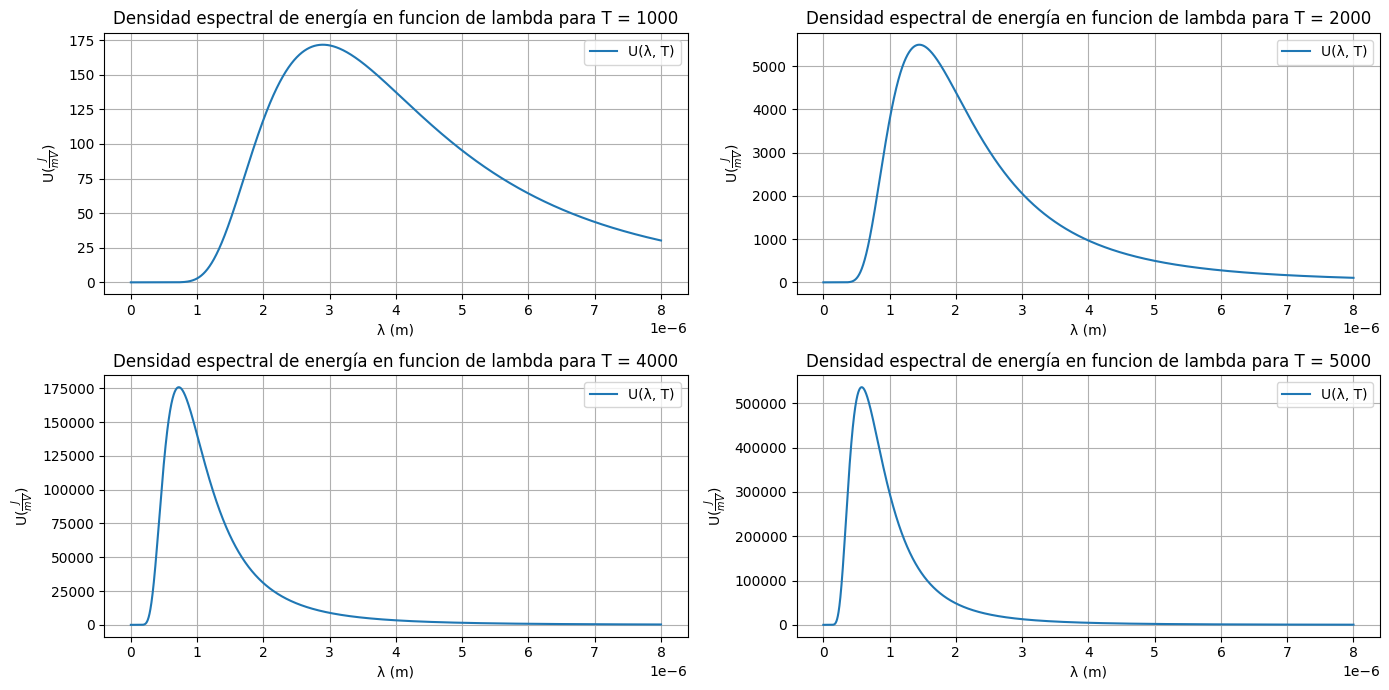

In [74]:
# Definimos nuestras constantes
h = 6.62607015e-34
c = 299792458
kB = 1.380649e-23

# Definimos la densidad espectral de energía
@np.vectorize # Vectorizamos
def U(lamda, T):
  I = 8*np.pi*h*c / lamda**5
  x = h*c / (lamda*kB*T)

  u = I / (np.exp(x)-1)

  return u

# Definimos las variables a evaluar
lamda = np.linspace(1e-9, 8e-6, 10000)
T = np.array([1000,2000,4000,5000])

plt.figure(figsize=(14, 7))  # Tamaño de la figura

# Graficamos para cada valor de T
for i in range(len(T)):
  plt.subplot(2, 2, i+1)  # Subgrafico i
  plt.title(f'Densidad espectral de energía en funcion de lambda para T = {T[i]}')
  plt.plot(lamda, U(lamda, T[i]), label = 'U(λ, T)')
  plt.xlabel('λ (m)')
  plt.ylabel('U' r'($\frac{J}{m V}$)')
  plt.legend()
  plt.grid()

plt.tight_layout()

Comparamos nuestro resultado con el obtenido de datos experimentales

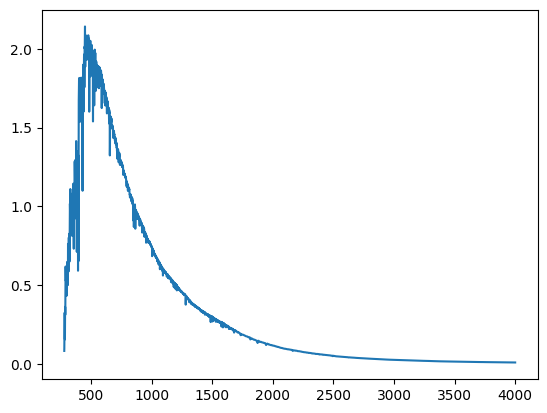

In [75]:
# URL del archivo txt en línea
url_del_archivo = 'http://www.sc.ehu.es/sbweb/fisica3/calor/radiacion/espectro.txt'

# Realizar una petición GET para obtener el contenido del archivo
respuesta = requests.get(url_del_archivo)

# Verificar que la petición fue exitosa
if respuesta.status_code == 200:
    # Acceder al contenido del archivo
    data_string = respuesta.text
else:
    print(f"Error al acceder al archivo: {respuesta.status_code}")
# Utilizar StringIO para simular un archivo en memoria a partir del string
data = StringIO(data_string)
# Convertir el string a DataFrame, especificando el separador de espacios
df = pd.read_csv(data, sep=" ", header=None)
# Asignar nombres a las columnas si es necesario
df.columns = ['A', 'B', 'C', "D"]
# Mostrar el DataFrame
plt.plot(df.A, df.B)

Vemos que las curvas resultantes reflejan el comportamiento típico de datos experimentales.

# Punto 2

In [76]:
# Usamos el mismo ciclo para calcular el lambda maximo para cada T
for i in range(len(T)):
  u_max = np.max(abs(U(lamda, T[i]))) # Maximo de la funcion
  pos = np.argmax(abs(U(lamda, T[i]))) # Posicion del maximo

  print(f'El maximo de U(λ, T) cuando T = {T[i]} K, es {u_max:.7} J/(V m), este ocurre para λ = {lamda[pos]:.2} m')

<ipython-input-74-91ecce76156a>:12: RuntimeWarning: overflow encountered in exp
  u = I / (np.exp(x)-1)


El maximo de U(λ, T) cuando T = 1000 K, es 171.678 J/(V m), este ocurre para λ = 2.9e-06 m
El maximo de U(λ, T) cuando T = 2000 K, es 5493.696 J/(V m), este ocurre para λ = 1.4e-06 m
El maximo de U(λ, T) cuando T = 4000 K, es 175798.2 J/(V m), este ocurre para λ = 7.2e-07 m
El maximo de U(λ, T) cuando T = 5000 K, es 536493.6 J/(V m), este ocurre para λ = 5.8e-07 m


Veamos ahora que para estos valores de $λ_{max}$ se cumple que $\lambda_{max} T=2897.8 \mathrm{\mu mK}$.

In [77]:
# Usamos el mismo ciclo pero ahora imprimimos la multiplicacion
for i in range(len(T)):
  u_max = np.max(abs(U(lamda, T[i]))) # Maximo de la funcion
  pos = np.argmax(abs(U(lamda, T[i]))) # Posicion del maximo

  lamt = lamda[pos]*T[i]

  print(f'Para estos valores de λ = {lamda[pos]:.2} m y T = {T[i]} K, tenemos que λT = {lamt*1e6:.5} μmK')

<ipython-input-74-91ecce76156a>:12: RuntimeWarning: overflow encountered in exp
  u = I / (np.exp(x)-1)


Para estos valores de λ = 2.9e-06 m y T = 1000 K, tenemos que λT = 2897.7 μmK
Para estos valores de λ = 1.4e-06 m y T = 2000 K, tenemos que λT = 2897.9 μmK
Para estos valores de λ = 7.2e-07 m y T = 4000 K, tenemos que λT = 2896.7 μmK
Para estos valores de λ = 5.8e-07 m y T = 5000 K, tenemos que λT = 2896.9 μmK


# Punto 3

Al realizar la sustitución propuesta, se encuentra que la constante de proporcionalidad α por la que hay que multiplicar la integral de la sustitución, para que esta sea igual a la potencia total emitida por unidad de área, es $α = \frac{2πk_{B}^4T^4}{h^3c^2}$

In [78]:
# Definimos la funcion a integrar despues de la sustitucion
f = lambda x: x**3 / (np.exp(x) - 1)

I = sc.integrate.quad(f, 0, 10**2.85) # Calculo de la integral, usamos 10**2.85 porque para un valor mayor ocurre un overflow en exp
v_e = np.pi**4/15 # Valor esperado

print(f'El valor de la integral es {I[0]}')
print(f'El valor esperado es {v_e}')

El valor de la integral es 6.493939402266829
El valor esperado es 6.493939402266828


In [79]:
# Definimos nuestro valor de proporcionalidad como una funcion de T, para probar nuestros valores de T
alpha = lambda T: (2*np.pi*kB**4*T**4) / (h**3*c**2)

sigma = 5.67*1e-8 # Valor de sigma

# Calculamos la potencia total para cada valor de T
for i in range(len(T)):
  print(f'El valor de la potencia total emitida por unidad de área, para T = {T[i]} K, es P = {alpha(T[i])*I[0]:.9} W/m^2')
  print(f'El valor esperado de la potencia para T = {T[i]} es P = {sigma*T[i]**4}')

El valor de la potencia total emitida por unidad de área, para T = 1000 K, es P = 56703.7442 W/m^2
El valor esperado de la potencia para T = 1000 es P = 56700.0
El valor de la potencia total emitida por unidad de área, para T = 2000 K, es P = 907259.907 W/m^2
El valor esperado de la potencia para T = 2000 es P = 907200.0
El valor de la potencia total emitida por unidad de área, para T = 4000 K, es P = 14516158.5 W/m^2
El valor esperado de la potencia para T = 4000 es P = 14515200.0
El valor de la potencia total emitida por unidad de área, para T = 5000 K, es P = 35439840.1 W/m^2
El valor esperado de la potencia para T = 5000 es P = 35437500.0


Vemos que los valores de la potencia total emitida concuerdan con los esperados al usar el valor de σ proporcionado.

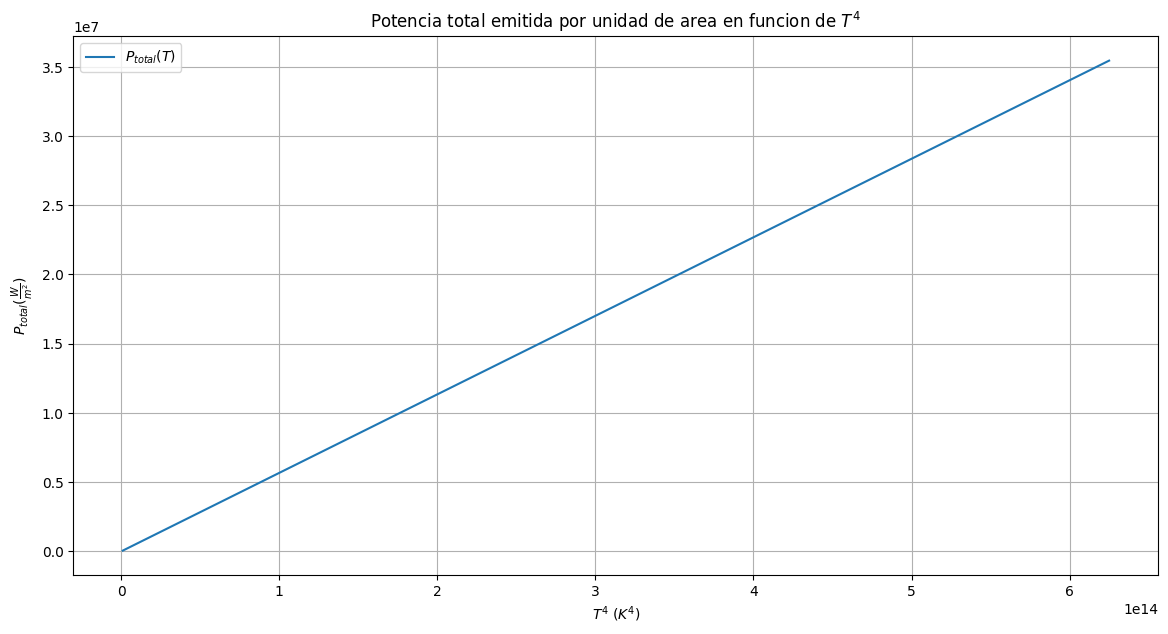

In [80]:
# Graficamos el comportamiento de la potencia en funcion de T^4
plt.figure(figsize=(14, 7))  # Tamaño de la figura
plt.title('Potencia total emitida por unidad de area en funcion de $T^4$')
plt.plot(T**4, alpha(T)*I[0], label = r'$P_{total}(T)$')
plt.xlabel('$T^4$ ($K^4$)')
plt.ylabel(r'$P_{total}$' r'($\frac{W}{m^2}$)')
plt.legend()
plt.grid()

Vemos que nuestro resultado concuerda con el esperado, ya que $P_{total} = σT^4$, es decir, la potencia total es proporcional a la temperatura elevada a la cuarta potencia.

# II. Calentamiento Global
El conjunto de datos a continuación ofrece una visión detallada de las anomalías de temperatura terrestre:


https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt


Las anomalías de temperatura son variaciones en la temperatura media superficial del planeta respecto a un promedio histórico. Estas variaciones pueden ser tanto positivas (más cálidas) como negativas (más frías) y constituyen indicadores esenciales del cambio climático a nivel mundial. Para obtener información adicional, consulte:


https://climate.nasa.gov/en-espanol/signos-vitales/temperatura-global/?intent=111

Este ejercicio no solo busca profundizar en la comprensión del calentamiento global, sino también distinguir entre la interpolación y la construcción de modelos. Con el código proporcionado que procesa los datos de cambio climático reportados por la National Aeronautics and Space Administration,


```python
import pandas as pd
import matplotlib.pylab as plt
url="https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"
data = pd.read_csv(url, sep='\\s+',header=None, skiprows=5)
data.columns = ["Año" ,"NoSauvizado",  "Promedio_5"]


# Muestra las primeras filas del DataFrame
print(data.head())
```

Realice lo siguiente en un gráfico combinado:



1. Gráfico de la media móvil de 5 años (Promedio_5) frente al año, representado con líneas.
2. Gráfico de los datos sin suavizar (NoSauvizado) frente al año.


3. Analice el gráfico resultante y extraiga conclusiones.

Posteriormente, construiremos un modelo para evaluar el incremento de la temperatura en años recientes utilizando el código de regresión dado a continuación:


```python
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define la función del modelo que deseas ajustar
# En este caso, una función lineal: f(x) = m*x + b
def linear_func(x, m, b):
    return m * x + b

# Datos de ejemplo, reemplace en esta linea por los valores de interes
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Realizar el ajuste de curva
params, covariance = curve_fit(linear_func, x, y)

# Parámetros del ajuste
m, b = params

# Generar datos de x para la línea de ajuste
x_fit = np.linspace(min(x), max(x), 100)
y_fit = linear_func(x_fit, m, b)

# Graficar datos y ajuste
plt.scatter(x, y, label='Datos')
plt.plot(x_fit, y_fit, label='Ajuste lineal', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

```


 Seleccione los datos del periodo 2000-2020 y proceda a:

4. Ajustar los datos sin suavizar (NoSauvizado) vs al año de forma lineal.
5. Interpolar los datos entre los años 2000 y 2020.


6. ¿Es preferible realizar una interpolación o un ajuste de parámetros al modelo en este caso? Justifique su respuesta.

7. ¿Cómo podría predecirse el incremento en la temperatura anómala para el año 2030? Justifique su respuesta.






# Punto 1 y 2

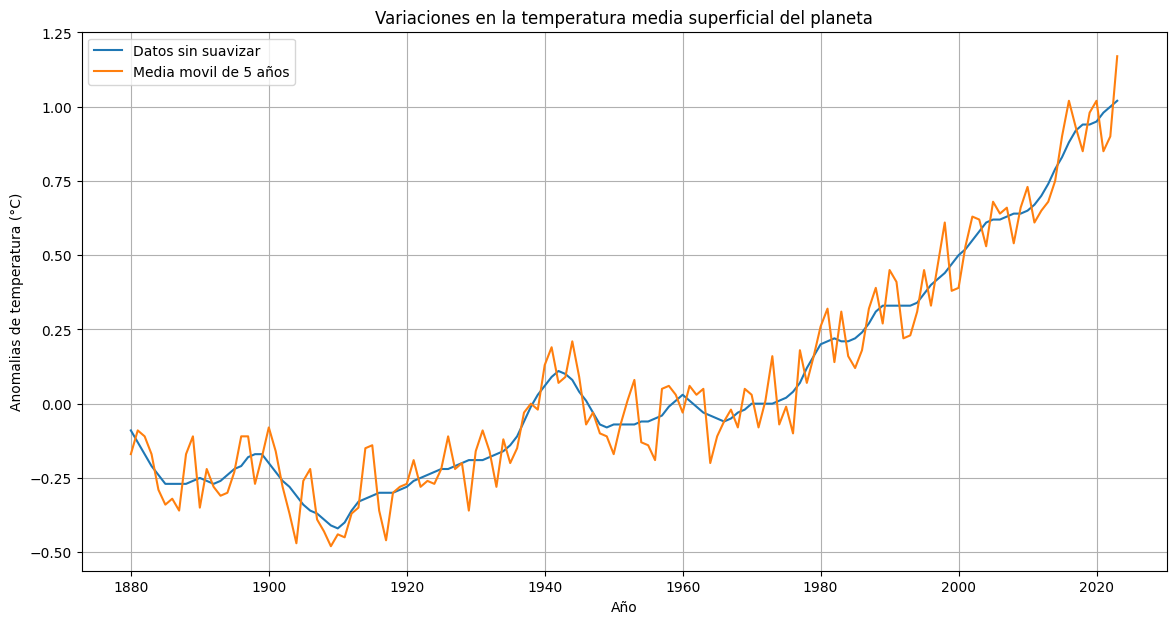

In [142]:
# Pasamos los datos a un DataFrame
url = "https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"
data = pd.read_csv(url, sep='\\s+', header=None, skiprows=5)
data.columns = ["Año" , "NoSuavizado",  "Promedio_5"] # Nombramos las columnas

# Graficamos
plt.figure(figsize=(14, 7))  # Tamaño de la figura
plt.title('Variaciones en la temperatura media superficial del planeta')
plt.plot(data["Año"], data["Promedio_5"], label = 'Datos sin suavizar')
plt.plot(data["Año"], data["NoSuavizado"], label = 'Media movil de 5 años')
plt.xlabel('Año')
plt.ylabel('Anomalias de temperatura (°C)')
plt.legend()
plt.grid()

# Punto 3

Al analizar el gráfico, podemos concluir que las anomalías en la temperatura están aumentando cada año. Además, el aumento de estas anomalías parece tener un comportamiento lineal con el paso de los años. Esto es una muestra de que el cambio climático es real y se deben tomar medidas significativas para mitigar estas anomalías en la temperatura.

# Punto 4

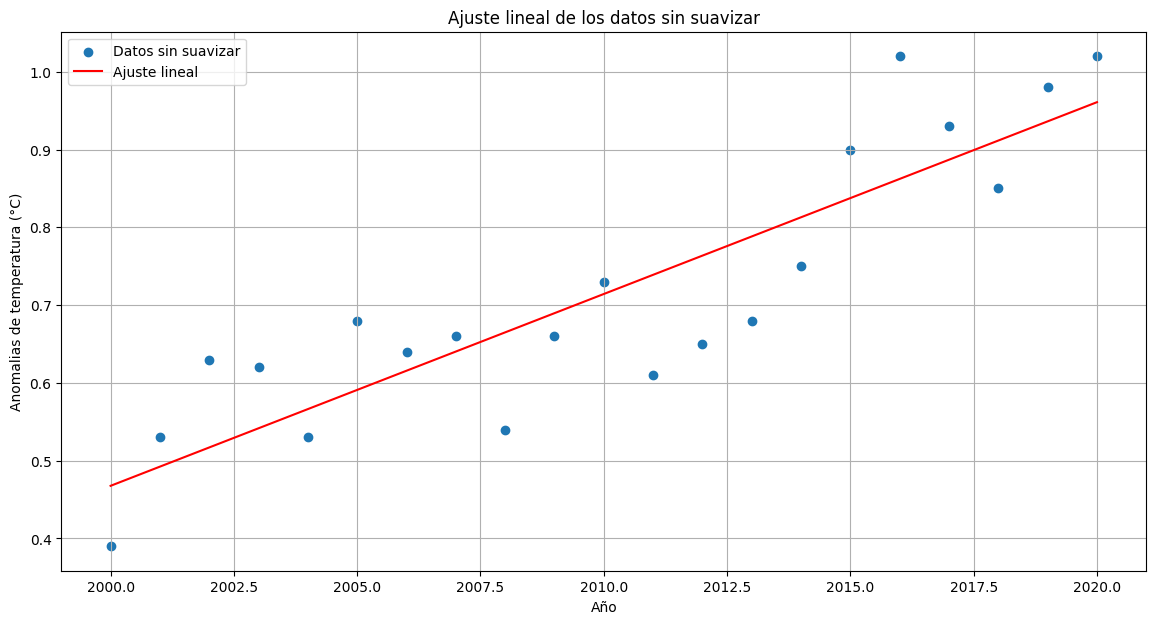

In [150]:
# Seleccionamos los datos del periodo 2000-2020
data2000 = data[120:141]

# Define la función del modelo que deseas ajustar
# En este caso, una función lineal: f(x) = m*x + b
def linear_func(x, m, b):
    return m * x + b

# Datos de ejemplo, reemplace en esta linea por los valores de interes
x = data2000["Año"]
y = data2000["NoSuavizado"]

# Realizar el ajuste de curva
params, covariance = curve_fit(linear_func, x, y)

# Parámetros del ajuste
m, b = params

# Generar datos de x para la línea de ajuste
x_fit = np.linspace(min(x), max(x), 100)
y_fit = linear_func(x_fit, m, b)

# Graficar datos y ajuste
plt.figure(figsize=(14, 7))  # Tamaño de la figura
plt.title('Ajuste lineal de los datos sin suavizar')
plt.scatter(x, y, label = 'Datos sin suavizar')
plt.plot(x_fit, y_fit, label='Ajuste lineal', color='red')
plt.xlabel('Año')
plt.ylabel('Anomalias de temperatura (°C)')
plt.legend()
plt.grid()
plt.show()

# Punto 5

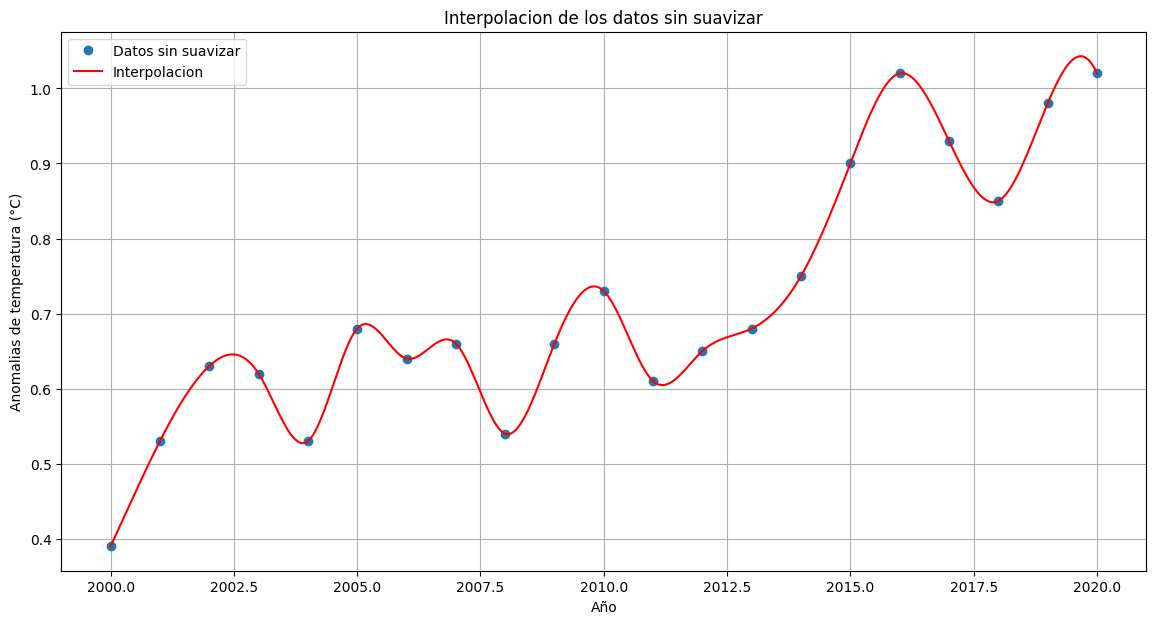

In [151]:
# Realizamos la interpolacion usando cubic splines
pln = CubicSpline(data2000["Año"].values, data2000["NoSuavizado"].values) # Funcion de interpolacion para los datos sin suavizar
xn = np.linspace(np.min(data2000["Año"]), np.max(data2000["Año"]), 1000)

# Graficamos la funcion original y la interpolacion
plt.figure(figsize=(14, 7))  # Tamaño de la figura
plt.title('Interpolacion de los datos sin suavizar')
plt.plot(data2000["Año"], data2000["NoSuavizado"], 'o', label = 'Datos sin suavizar')
plt.plot(xn, pln(xn), 'r-', label = 'Interpolacion')
plt.xlabel('Año')
plt.ylabel('Anomalias de temperatura (°C)')
plt.legend()
plt.grid()

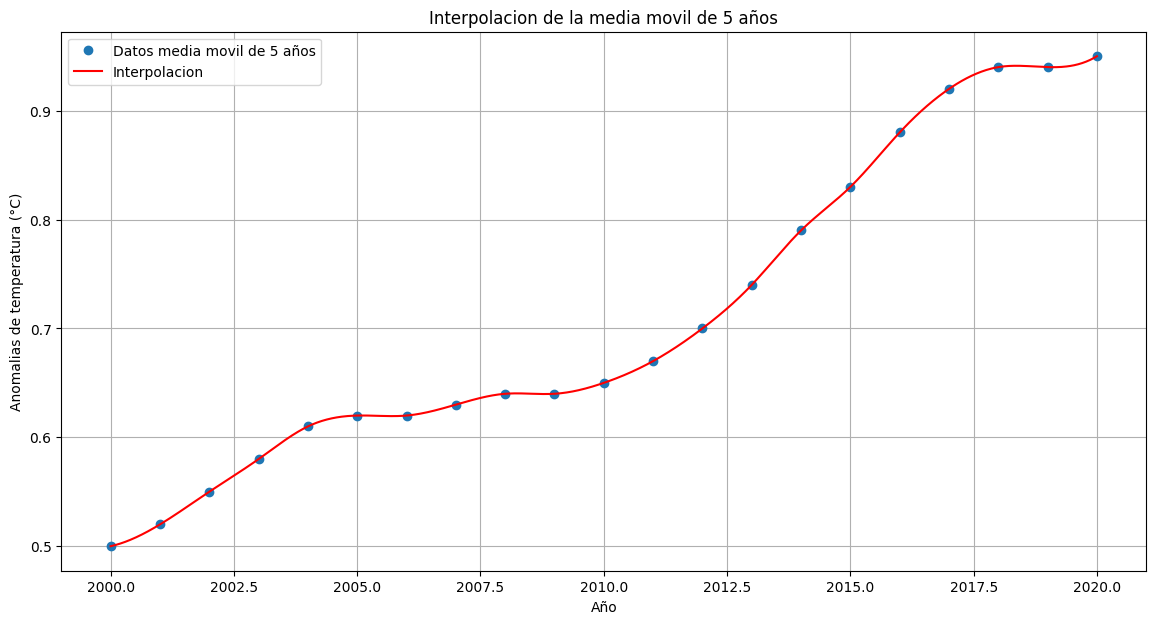

In [152]:
# Realizamos la interpolacion usando cubic splines
plm = CubicSpline(data2000["Año"].values, data2000["Promedio_5"].values) # Funcion de interpolacion para los datos de la media movil
xm = np.linspace(np.min(data2000["Año"]), np.max(data2000["Año"]), 1000)

# Graficamos la funcion original y la interpolacion
plt.figure(figsize=(14, 7))  # Tamaño de la figura
plt.title('Interpolacion de la media movil de 5 años')
plt.plot(data2000["Año"], data2000["Promedio_5"], 'o', label = 'Datos media movil de 5 años')
plt.plot(xm, plm(xm), 'r-', label = 'Interpolacion')
plt.xlabel('Año')
plt.ylabel('Anomalias de temperatura (°C)')
plt.legend()
plt.grid()

# Punto 6

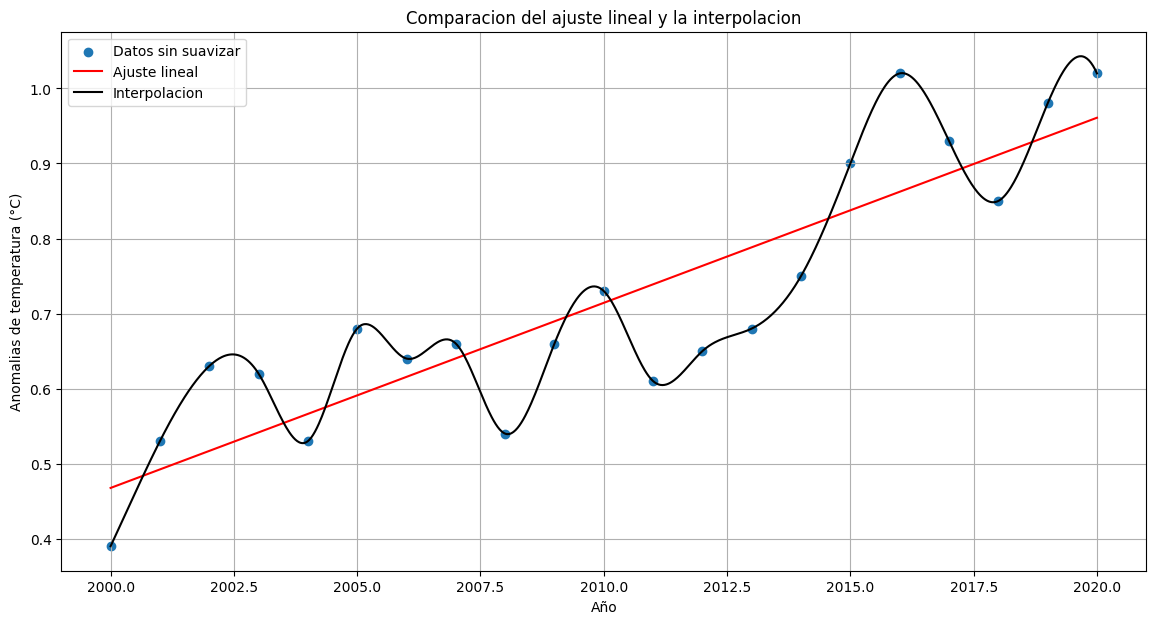

In [153]:
# Superponemos las graficas de ajuste lineal e interpolacion de los datos sin suavizar
plt.figure(figsize=(14, 7))  # Tamaño de la figura
plt.title('Comparacion del ajuste lineal y la interpolacion')
plt.scatter(x, y, label = 'Datos sin suavizar')
plt.plot(x_fit, y_fit, label='Ajuste lineal', color='red')
plt.plot(xn, pln(xn), 'k-', label = 'Interpolacion')
plt.xlabel('Año')
plt.ylabel('Anomalias de temperatura (°C)')
plt.legend()
plt.grid()
plt.show()

Podemos concluir que, para este caso, la mejor opción es el ajuste de parámetros al modelo, ya que nos permite definir un modelo con el cual podamos hacer predicciones. Además, en la gráfica observamos que los datos se distribuyen aleatoriamente alrededor de la linealización, lo que nos da una idea de que el mejor ajuste para nuestro modelo es un ajuste lineal.

# Punto 7

Para realizar la predicción del año 2030, bastaría con agregar el año 2030 a nuestros datos y, con el ajuste y la interpolación, calcular el valor predicho no suavizado para este año.

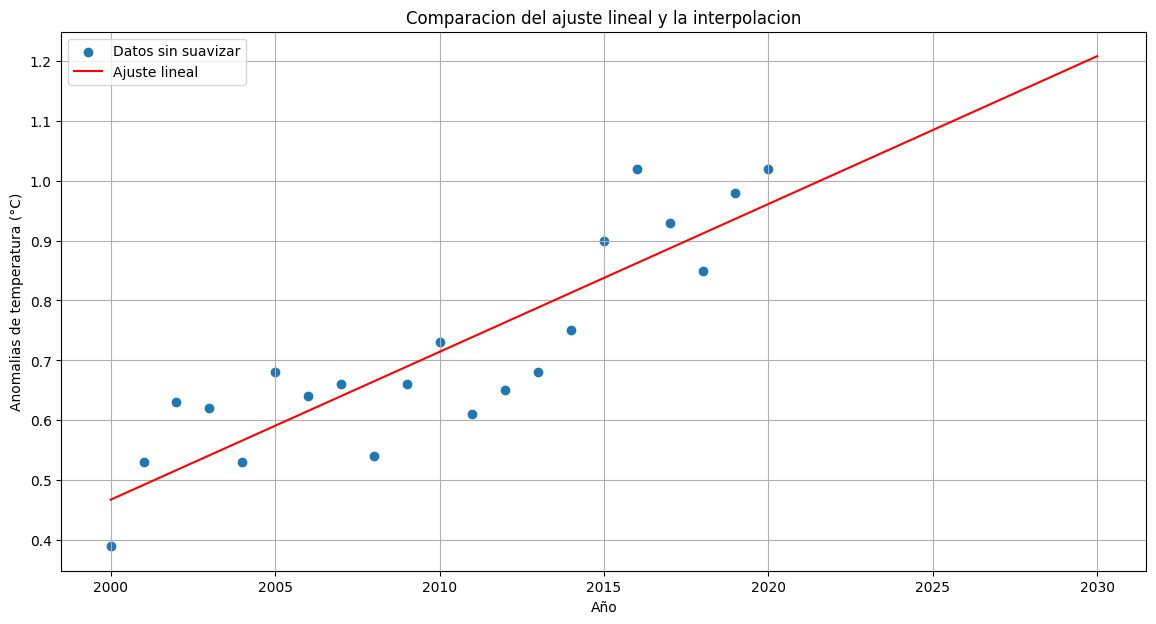

In [162]:
# Prediccion para el año 2030 con el ajuste lineal
# Generar datos de x para la línea de ajuste
x_fit = np.linspace(min(x), 2030, 100)
y_fit = linear_func(x_fit, m, b)

# Superponemos las graficas de ajuste lineal e interpolacion con la prediccion para el año 2030
plt.figure(figsize=(14, 7))  # Tamaño de la figura
plt.title('Comparacion del ajuste lineal y la interpolacion')
plt.scatter(x, y, label = 'Datos sin suavizar')
plt.plot(x_fit, y_fit, label='Ajuste lineal', color='red')
plt.xlabel('Año')
plt.ylabel('Anomalias de temperatura (°C)')
plt.legend()
plt.grid()
plt.show()

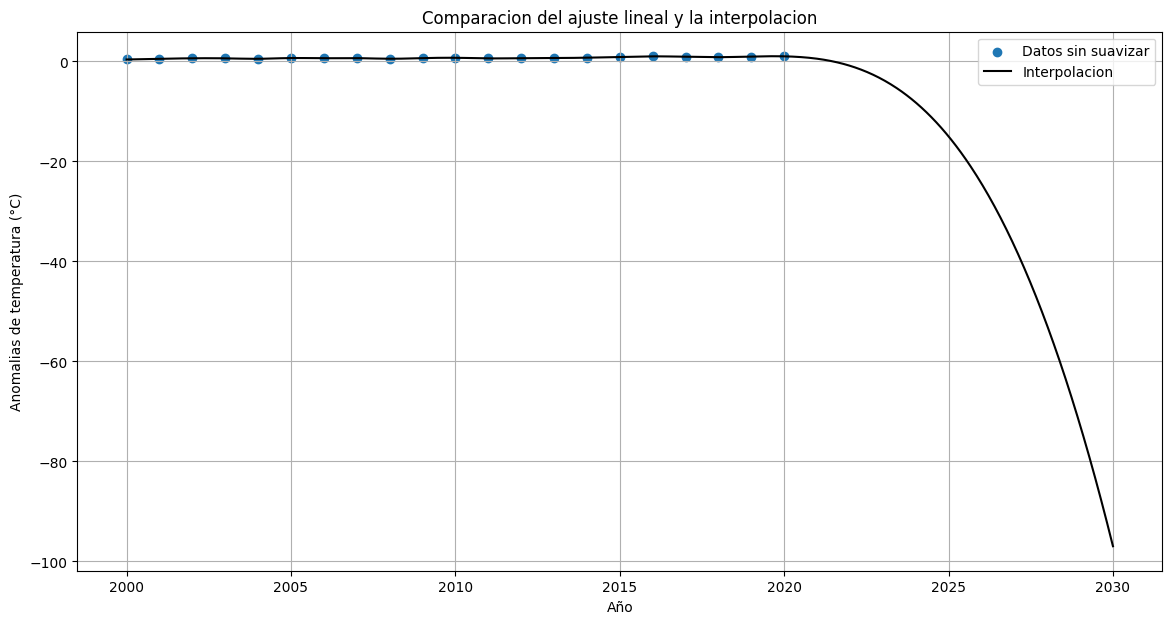

In [163]:
# Definimos el nuevo dato
n_año = 2030
n_a = pln(n_año) # Valor para 2030 usando interpolacion
xn = np.linspace(np.min(data2000["Año"]), 2030, 1000) # Ajustamos xn

# Superponemos las graficas de ajuste lineal e interpolacion con la prediccion para el año 2030
plt.figure(figsize=(14, 7))  # Tamaño de la figura
plt.title('Comparacion del ajuste lineal y la interpolacion')
plt.scatter(x, y, label = 'Datos sin suavizar')
plt.plot(xn, pln(xn), 'k-', label = 'Interpolacion')
plt.xlabel('Año')
plt.ylabel('Anomalias de temperatura (°C)')
plt.legend()
plt.grid()
plt.show()

Como podemos apreciar en las predicciones, la interpolación de los datos resulta ser una mala idea para el modelo. Al predecir el valor para el año 2030, la interpolación carece de sentido. Por otro lado, con la predicción lineal observamos que sigue el comportamiento esperado a lo largo de los años. Con este punto, reafirmamos que la mejor idea es realizar un ajuste lineal para el modelo.